<a href="https://www.kaggle.com/code/kusumakar/diet-eda-and-ml-r2-score-0-9?scriptVersionId=224563028" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comprehensive-weight-change-prediction/weight_change_dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/comprehensive-weight-change-prediction/weight_change_dataset.csv")

In [3]:
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [4]:
df.isnull().sum()

Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64

In [5]:
df.dtypes

Participant ID                     int64
Age                                int64
Gender                            object
Current Weight (lbs)             float64
BMR (Calories)                   float64
Daily Calories Consumed          float64
Daily Caloric Surplus/Deficit    float64
Weight Change (lbs)              float64
Duration (weeks)                   int64
Physical Activity Level           object
Sleep Quality                     object
Stress Level                       int64
Final Weight (lbs)               float64
dtype: object

In [6]:
df.drop(columns=['Participant ID'],inplace=True)

In [7]:
df.head()

,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#### - We will drop Final Weight Column and keep Weight Change as the Target Variable


In [9]:
df.drop(columns=['Final Weight (lbs)'],inplace=True)

In [10]:
df.head()

,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level
0,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6
1,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6
2,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3
3,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2
4,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1


In [11]:
## Change the column names to shorter ones, for easy analysis
df.columns

df.rename(columns={'Current Weight (lbs)':"CurrentWeight", 'BMR (Calories)':"BMR",
       'Daily Calories Consumed':"DailyCaloriesConsumed", 'Daily Caloric Surplus/Deficit':"DailyCaloriesDeficit",
       'Weight Change (lbs)':"WeightChange", 'Duration (weeks)':"Duration", 'Physical Activity Level':"ActivityLevel",
       'Sleep Quality':"SleepQuality", 'Stress Level':"StressLevel"},inplace=True)

In [12]:
df.head()

,Age,Gender,CurrentWeight,BMR,DailyCaloriesConsumed,DailyCaloriesDeficit,WeightChange,Duration,ActivityLevel,SleepQuality,StressLevel
0,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6
1,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6
2,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3
3,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2
4,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1


### Exploratory Data Analysis

### Weight Change Gender Wise

<Axes: xlabel='Gender', ylabel='WeightChange'>

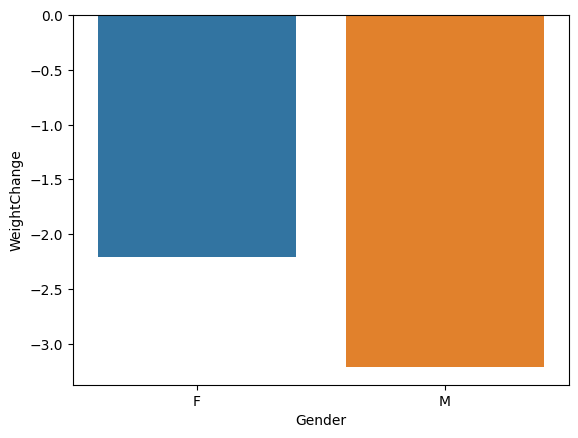

In [13]:
df1 = df.groupby("Gender").agg({"WeightChange":"mean"}).reset_index()
sns.barplot(x='Gender',y='WeightChange',data=df1)

<Axes: xlabel='Duration', ylabel='WeightChange'>

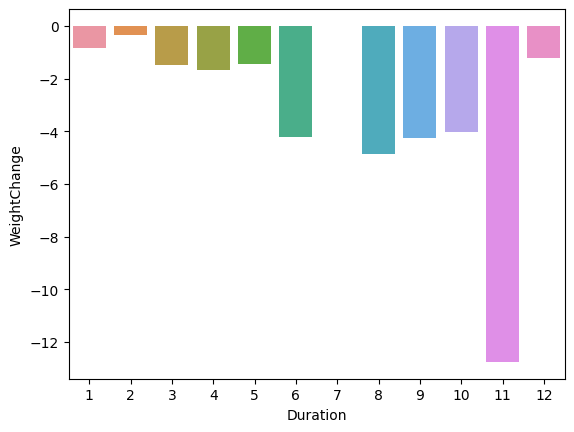

In [14]:
df1 = df.groupby("Duration").agg({"WeightChange":"mean"}).reset_index().sort_values(by='WeightChange')
sns.barplot(x='Duration',y='WeightChange',data=df1.sort_values(by='WeightChange'))

<Axes: xlabel='ActivityLevel', ylabel='WeightChange'>

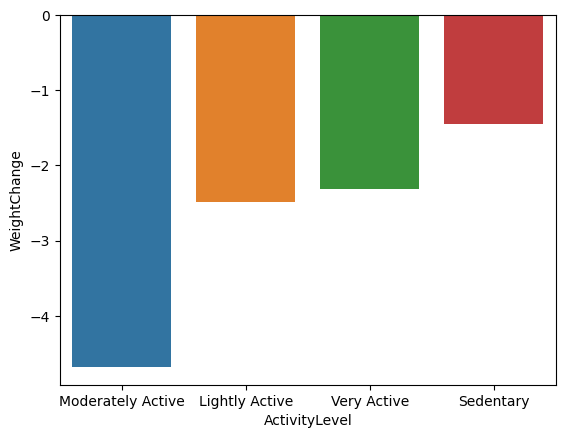

In [15]:
df1 = df.groupby("ActivityLevel").agg({"WeightChange":"mean"}).reset_index().sort_values(by='WeightChange')
sns.barplot(x='ActivityLevel',y='WeightChange',data=df1.sort_values(by='WeightChange'))

<Axes: xlabel='StressLevel', ylabel='WeightChange'>

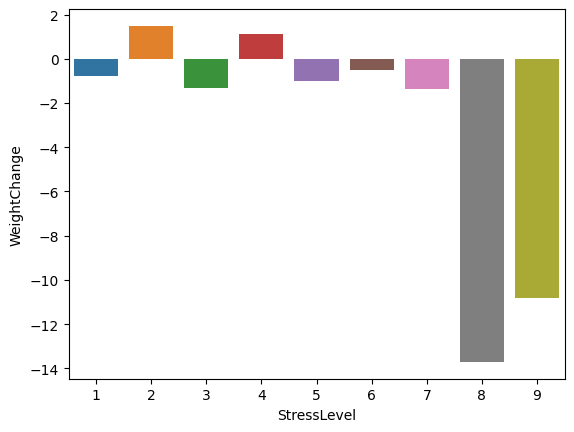

In [16]:
df1 = df.groupby("StressLevel").agg({"WeightChange":"mean"}).reset_index().sort_values(by='WeightChange')
sns.barplot(x='StressLevel',y='WeightChange',data=df1.sort_values(by='WeightChange'))

<Axes: xlabel='SleepQuality', ylabel='WeightChange'>

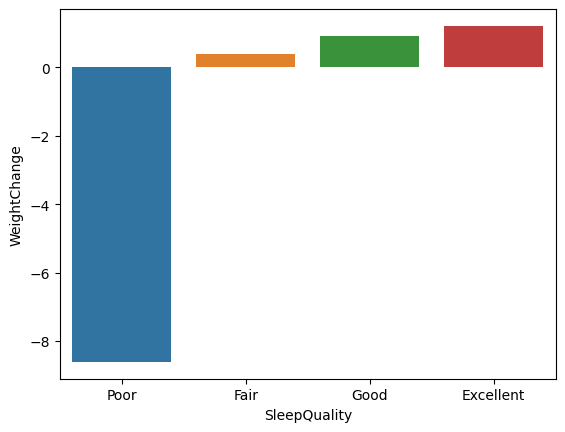

In [17]:
df1 = df.groupby("SleepQuality").agg({"WeightChange":"mean"}).reset_index().sort_values(by='WeightChange')
sns.barplot(x='SleepQuality',y='WeightChange',data=df1.sort_values(by='WeightChange'))

###  check impact of each numerical column on Target Variable

In [18]:
numerical = list(df.select_dtypes(include=['float64','int64']).columns)

<Axes: >

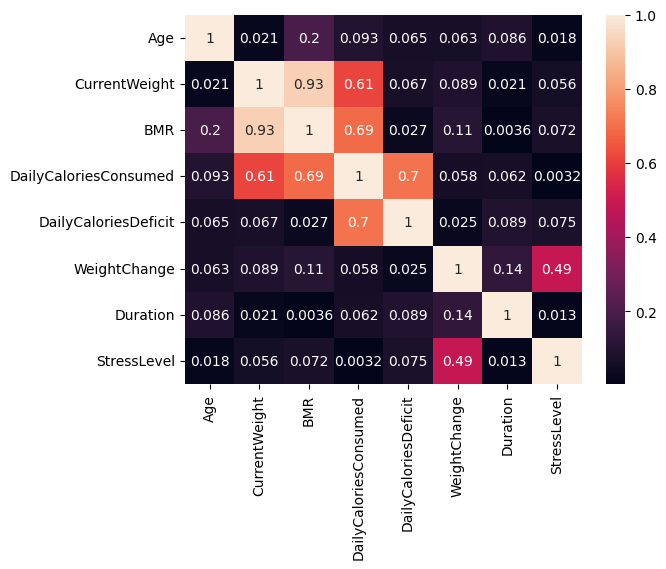

In [19]:
sns.heatmap(df[numerical].corr().abs(),annot=True)

In [20]:
## Drop highly correlated columns
df.drop(columns = ['BMR'],inplace=True)

In [21]:
numerical = list(df.select_dtypes(include=['float64','int64']).columns)

In [22]:
df.head()

,Age,Gender,CurrentWeight,DailyCaloriesConsumed,DailyCaloriesDeficit,WeightChange,Duration,ActivityLevel,SleepQuality,StressLevel
0,56,M,228.4,3916.0,813.7,0.2,1,Sedentary,Excellent,6
1,46,F,165.4,3823.0,1547.5,2.4,6,Very Active,Excellent,6
2,32,F,142.8,2785.4,666.0,1.4,7,Sedentary,Good,3
3,25,F,145.5,2587.3,406.0,0.8,8,Sedentary,Fair,2
4,38,M,155.5,3312.8,849.0,2.0,10,Lightly Active,Good,1


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [24]:
numerical

['Age',
 'CurrentWeight',
 'DailyCaloriesConsumed',
 'DailyCaloriesDeficit',
 'WeightChange',
 'Duration',
 'StressLevel']

In [25]:
transformer = ColumnTransformer(
[("Standardise",StandardScaler(),['Age','CurrentWeight','DailyCaloriesConsumed','DailyCaloriesDeficit','Duration','StressLevel']),
("Encode",OneHotEncoder(),["Gender","ActivityLevel","SleepQuality","StressLevel"])],remainder="passthrough")

In [26]:
X = df.drop(columns=["WeightChange"])
Y=df['WeightChange']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25)

In [27]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
models = {"Random Forest Regressor":RandomForestRegressor(),
         "Decision Tree Regressor":DecisionTreeRegressor(),
         "Linear Regressor":LinearRegression(),
         "XGBoost Regression":XGBRegressor(),
         }
r2_scores=[]
mean_squared = []
mean_absolute = []
model_list =[]
for model_name,model in models.items():
    model.fit(X_train_transformed,Y_train)
    ypred = model.predict(X_test_transformed)
    r2_scores.append(r2_score(Y_test,ypred))
    mean_squared.append(mean_squared_error(Y_test,ypred))
    mean_absolute.append(mean_absolute_error(Y_test,ypred))
    model_list.append(model_name)

In [29]:
accuracy_data = pd.DataFrame()
accuracy_data['Model ']=model_list
accuracy_data['R2 Score']=r2_scores



accuracy_data

,Model,R2 Score
0,Random Forest Regressor,0.743385
1,Decision Tree Regressor,0.690483
2,Linear Regressor,0.618908
3,XGBoost Regression,0.831910
